In [1]:
# !pip install pytrends

In [3]:
from pytrends.request import TrendReq
import pandas as pd
import itertools
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')


In [4]:
pytrends = TrendReq(hl='en-US', tz=360)

In [5]:
# Initial test
kw_list = ["Career Change"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='US', gprop='')

In [6]:
career_change_top = pytrends.related_queries()[kw_list[0]]["top"]

In [7]:
new_list = []
for x in kw_list:
    for l in x:
        new_list.append(l)
len(new_list)

13

In [8]:
# Job site searches; top job search sites via RH
kw_list = ["Robert Half","Career Builder","Indeed",'Monster','LinkedIn']
pytrends.build_payload(kw_list, cat=0, timeframe='2005-01-01 2018-12-31', geo='US', gprop='')

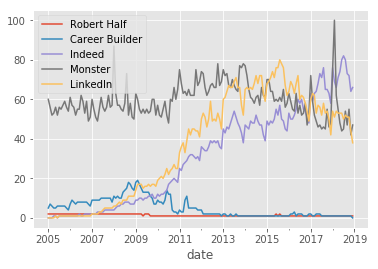

In [9]:
pytrends.interest_over_time().plot()

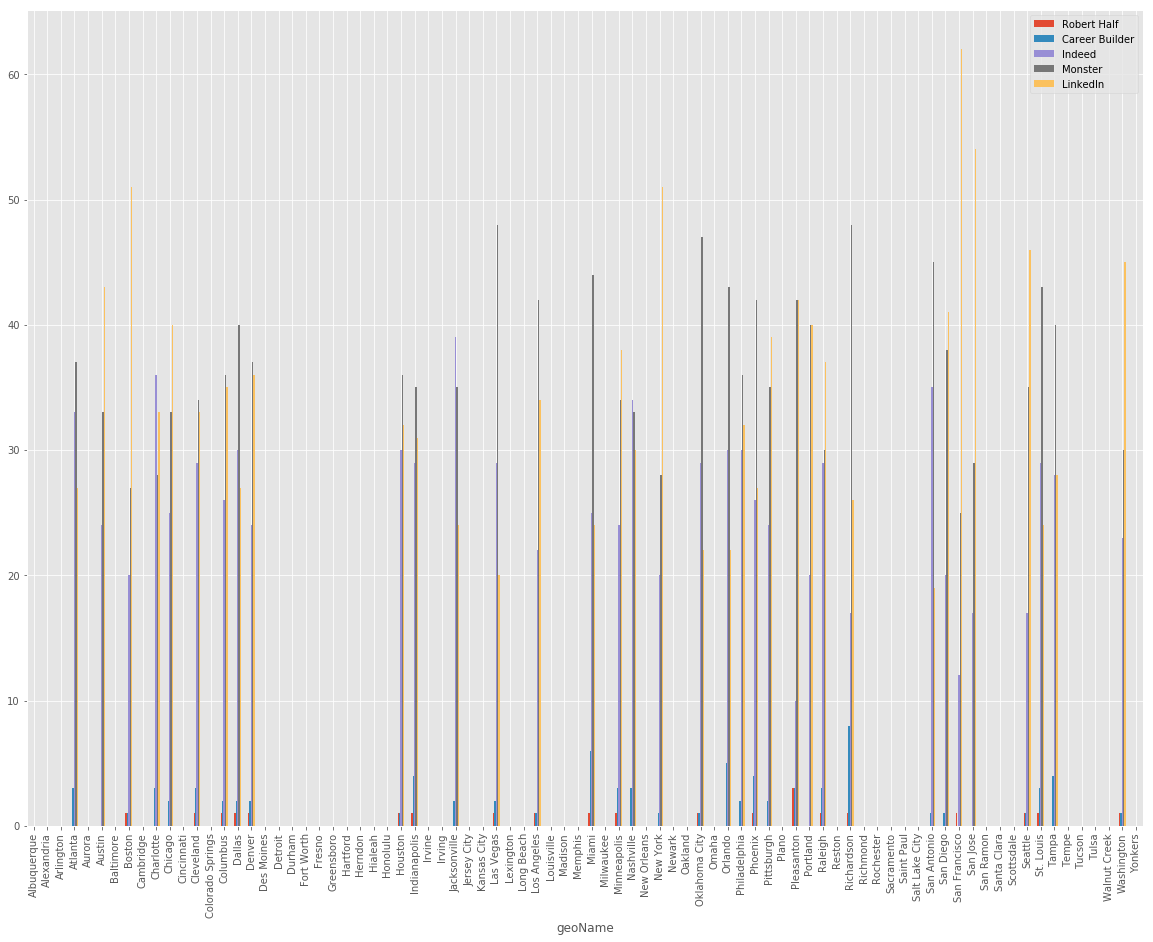

In [10]:
pytrends.interest_by_region(resolution="CITY").plot.bar(figsize=[20,15])

In [11]:
kw_list = ["Robert Half","Career Builder"]
pytrends.build_payload(kw_list, cat=0, timeframe='2005-01-01 2018-12-31', geo='US', gprop='')

In [12]:
df_rh_cb = pytrends.interest_over_time()

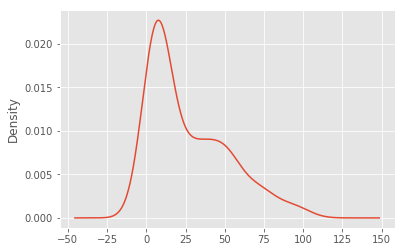

In [13]:
# Can solve relative information, but finding mean of this information and noting normal distribution curve/where they spike
df_rh_cb["Career Builder"].plot.kde()

In [14]:
kw_list = ['job']
pytrends.build_payload(kw_list, cat=0, timeframe='2005-01-01 2018-12-31', geo='US', gprop='')

In [15]:
df_job = pytrends.interest_over_time()

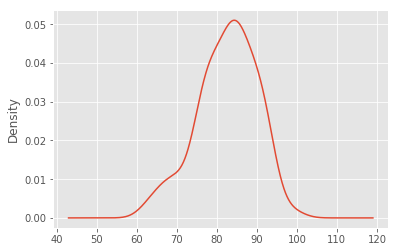

In [16]:
df_job.job.plot.kde()

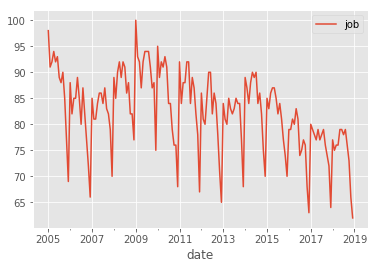

In [17]:
# Steve Jobs died in October 2011
df_job.plot()

In [18]:
kw_list = ['career']
pytrends.build_payload(kw_list, cat=0, timeframe='2005-01-01 2018-12-31', geo='US', gprop='')

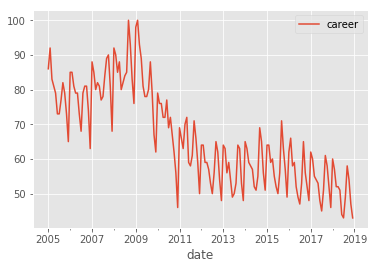

In [19]:
pytrends.interest_over_time().plot()

In [20]:
kw_list = ['work']
pytrends.build_payload(kw_list, cat=0, timeframe='2005-01-01 2018-12-31', geo='US', gprop='')

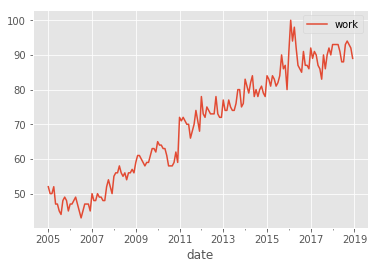

In [21]:
# Rihanna's Song "Work" was released in 2016
pytrends.interest_over_time().plot()

In [22]:
def arima_modeler(data,pdq_lower,pdq_upper,m):
    p = d = q = range(pdq_lower, pdq_upper)
    pdq = list(itertools.product(p, d, q))
    pdqs = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(data,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic])
            except:
                continue
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    print(ans_df.loc[ans_df['aic'].idxmin()])
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data,
                                order=ans_df.loc[ans_df['aic'].idxmin()][0],
                                seasonal_order=ans_df.loc[ans_df['aic'].idxmin()][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    output = ARIMA_MODEL.fit()
    print(output.summary().tables[1])
    return output

def dataframe_converter(df,column_name):
    return pd.to_numeric(df[str(column_name)],downcast="float")

In [23]:
arima_input = dataframe_converter(df_job,"job")

In [24]:
# df_job_arima = arima_modeler(arima_input,0,3,12)

In [25]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [26]:
df_job_arima.forecast(12)

NameError: name 'df_job_arima' is not defined

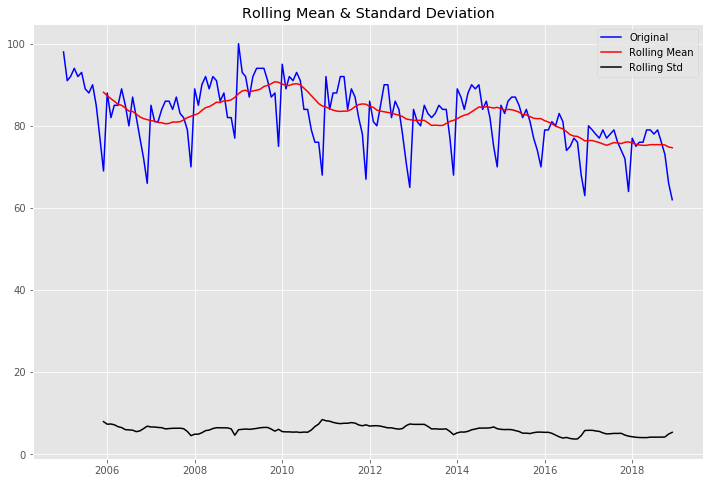

Results of Dickey-Fuller Test:
Test Statistic                  -1.064545
p-value                          0.729002
#Lags Used                      14.000000
Number of Observations Used    153.000000
Critical Value (1%)             -3.473830
Critical Value (5%)             -2.880623
Critical Value (10%)            -2.576945
dtype: float64


In [27]:
test_stationarity(arima_input)

In [37]:
# Dickey Fuller Testing
from statsmodels.tsa.stattools import adfuller

In [52]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

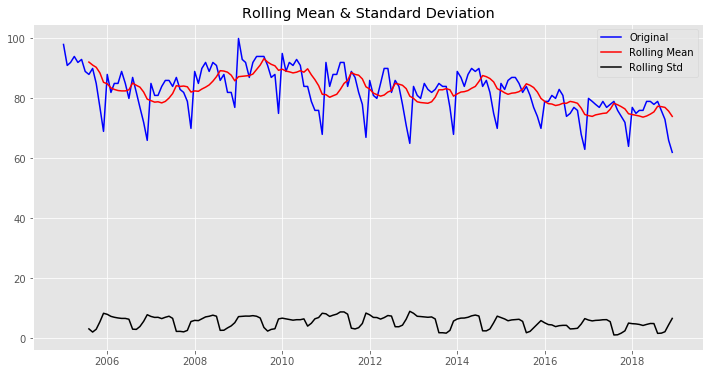

Results of Dickey-Fuller Test:
Test Statistic                  -1.064545
p-value                          0.729002
#Lags Used                      14.000000
Number of Observations Used    153.000000
Critical Value (1%)             -3.473830
Critical Value (5%)             -2.880623
Critical Value (10%)            -2.576945
dtype: float64


In [53]:
stationarity_check(arima_input)

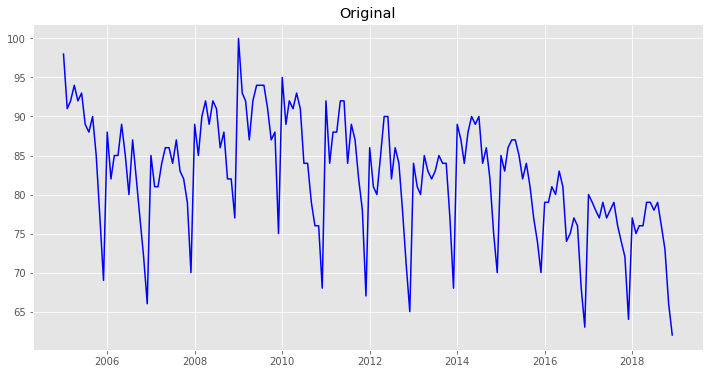

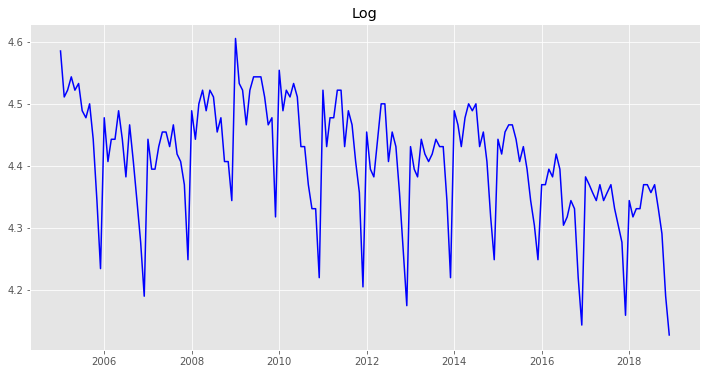

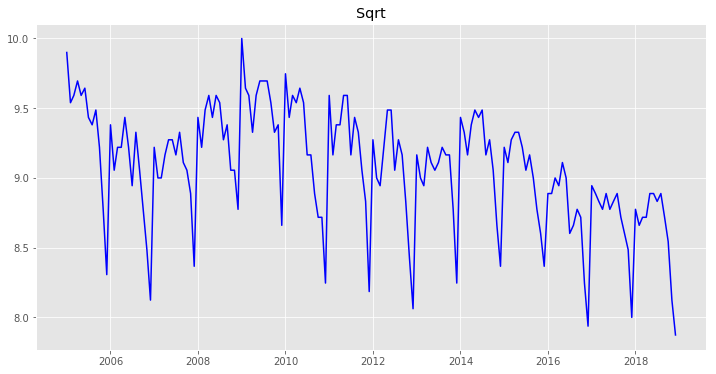

In [55]:
# Does transforming look any better?
ts_log = np.log(arima_input)
ts_sqrt= np.sqrt(arima_input)
fig = plt.figure(figsize=(12,6))
plt.plot(arima_input,  color='blue');
plt.title('Original')
plt.show()
fig = plt.figure(figsize=(12,6))
plt.plot(ts_log, color='blue');
plt.title('Log')
plt.show()
fig = plt.figure(figsize=(12,6))
plt.title('Sqrt')
plt.plot(ts_sqrt, color='blue');
# Result: Going to use log -- since the raw values are closer to each other

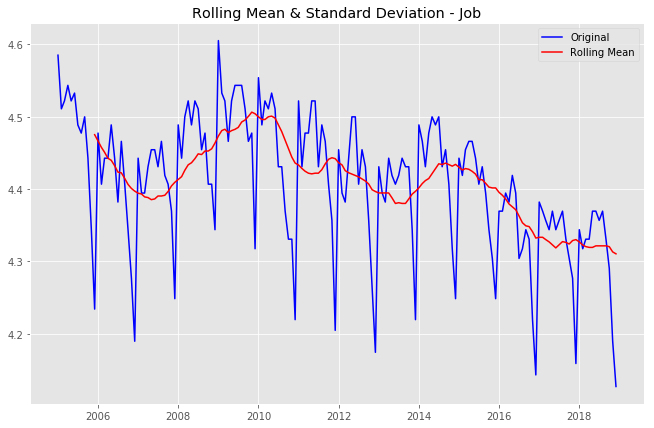

In [61]:
rolmean = np.log(arima_input).rolling(window = 12).mean()
fig = plt.figure(figsize=(11,7))
orig = plt.plot(np.log(arima_input), color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation - Job')
plt.show(block=False)
# Interesting Observation: it almost looks like people searching for jobs falls after unemployment actually goes up

In [67]:
data_minus_rolmean = np.log(arima_input) - rolmean
# Adding in rolmean creates NaNs for first year
data_minus_rolmean.dropna(inplace=True)

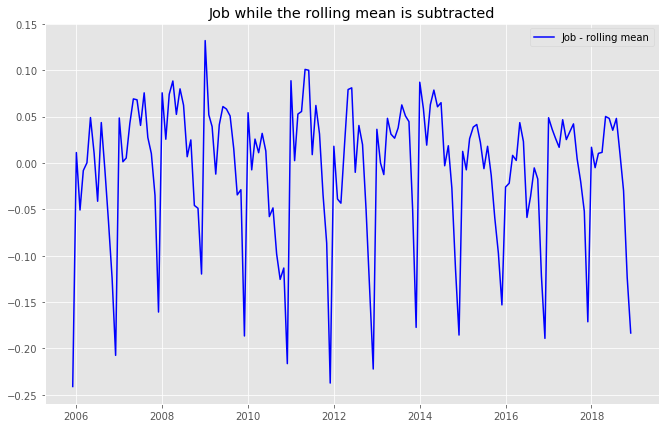

In [68]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolmean, color='blue',label='Job - rolling mean')
plt.legend(loc='best')
plt.title('Job while the rolling mean is subtracted')
plt.show(block=False)

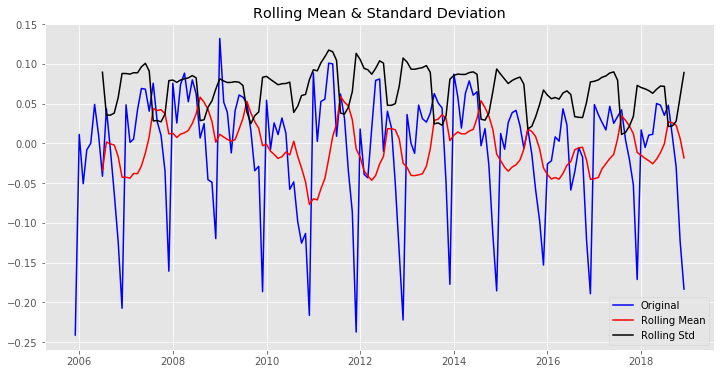

Results of Dickey-Fuller Test:
Test Statistic                  -3.186117
p-value                          0.020802
#Lags Used                      14.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64


In [69]:
stationarity_check(data_minus_rolmean)